In [6]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format='retina'
import random

In [7]:
print(f'Python  version:  {sys.version}')
print(f'pandas  version = {pd.__version__}')
print(f'numpy   version = {np.__version__}')
print(f'seaborn version = {sns.__version__}')
print(pd.Timestamp.now())

Python  version:  3.9.13 (main, Aug 25 2022, 23:51:50) [MSC v.1916 64 bit (AMD64)]
pandas  version = 1.4.4
numpy   version = 1.21.5
seaborn version = 0.11.2
2023-04-01 22:02:58.771373


In [8]:
df= pd.read_excel("databest.xlsx")
df.sample(1000)

,CB_IR_Si,CB_ConT_Si,CB_CR_Si,CB_SF6Press_Si,CB_SF6Dew_Si,CB_%SF6_Si,CB_SF6Pur_Si,CB_SO2_Si,CB_Vis_Si,CB_Gas_Si,...,DS_Lub_Si,HI_DS,LA_CR_Si,LA_IR_Si,LA_IP_Si,LA_Fas_Si,LA_UC_Si,LA_Ter_Si,HI_LA,HI_Total
2775,5,5,0,3,0,5,0,5,5,5,...,5,25.0,0,5,0,5,5,5,33.333333,31.616667
567,0,5,0,5,5,5,0,5,5,5,...,5,37.5,5,5,0,5,5,5,16.666667,34.013889
2203,0,5,5,3,0,5,5,0,5,5,...,5,37.5,0,5,5,0,5,5,33.333333,39.713889
46,0,0,0,0,5,0,5,5,5,0,...,0,50.0,5,0,5,5,5,0,33.333333,53.611111
873,5,0,0,3,5,0,5,0,0,5,...,5,50.0,5,0,5,0,0,5,50.000000,48.088889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2733,5,5,0,0,5,0,5,5,0,5,...,5,37.5,5,0,5,5,0,5,33.333333,39.513889
2869,5,5,0,5,5,5,0,5,0,5,...,5,50.0,5,5,0,5,0,5,33.333333,38.388889
2478,5,0,0,5,5,0,5,5,5,0,...,0,37.5,5,0,5,5,5,0,33.333333,37.291667
397,0,5,0,0,0,0,5,5,0,5,...,5,50.0,0,0,5,5,0,5,50.000000,51.888889


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3072 entries, 0 to 3071
Data columns (total 49 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CB_IR_Si        3072 non-null   int64  
 1   CB_ConT_Si      3072 non-null   int64  
 2   CB_CR_Si        3072 non-null   int64  
 3   CB_SF6Press_Si  3072 non-null   int64  
 4   CB_SF6Dew_Si    3072 non-null   int64  
 5   CB_%SF6_Si      3072 non-null   int64  
 6   CB_SF6Pur_Si    3072 non-null   int64  
 7   CB_SO2_Si       3072 non-null   int64  
 8   CB_Vis_Si       3072 non-null   int64  
 9   CB_Gas_Si       3072 non-null   int64  
 10  HI_CB           3072 non-null   float64
 11  CT_CR_Si        3072 non-null   int64  
 12  CT_IR_Si        3072 non-null   int64  
 13  CT_IP_Si        3072 non-null   int64  
 14  CT_Turn_Si      3072 non-null   int64  
 15  CT_Break_Si     3072 non-null   int64  
 16  CT_Water_Si     3072 non-null   int64  
 17  CT_Fas_Si       3072 non-null   i

In [10]:
df.dropna(inplace=True)

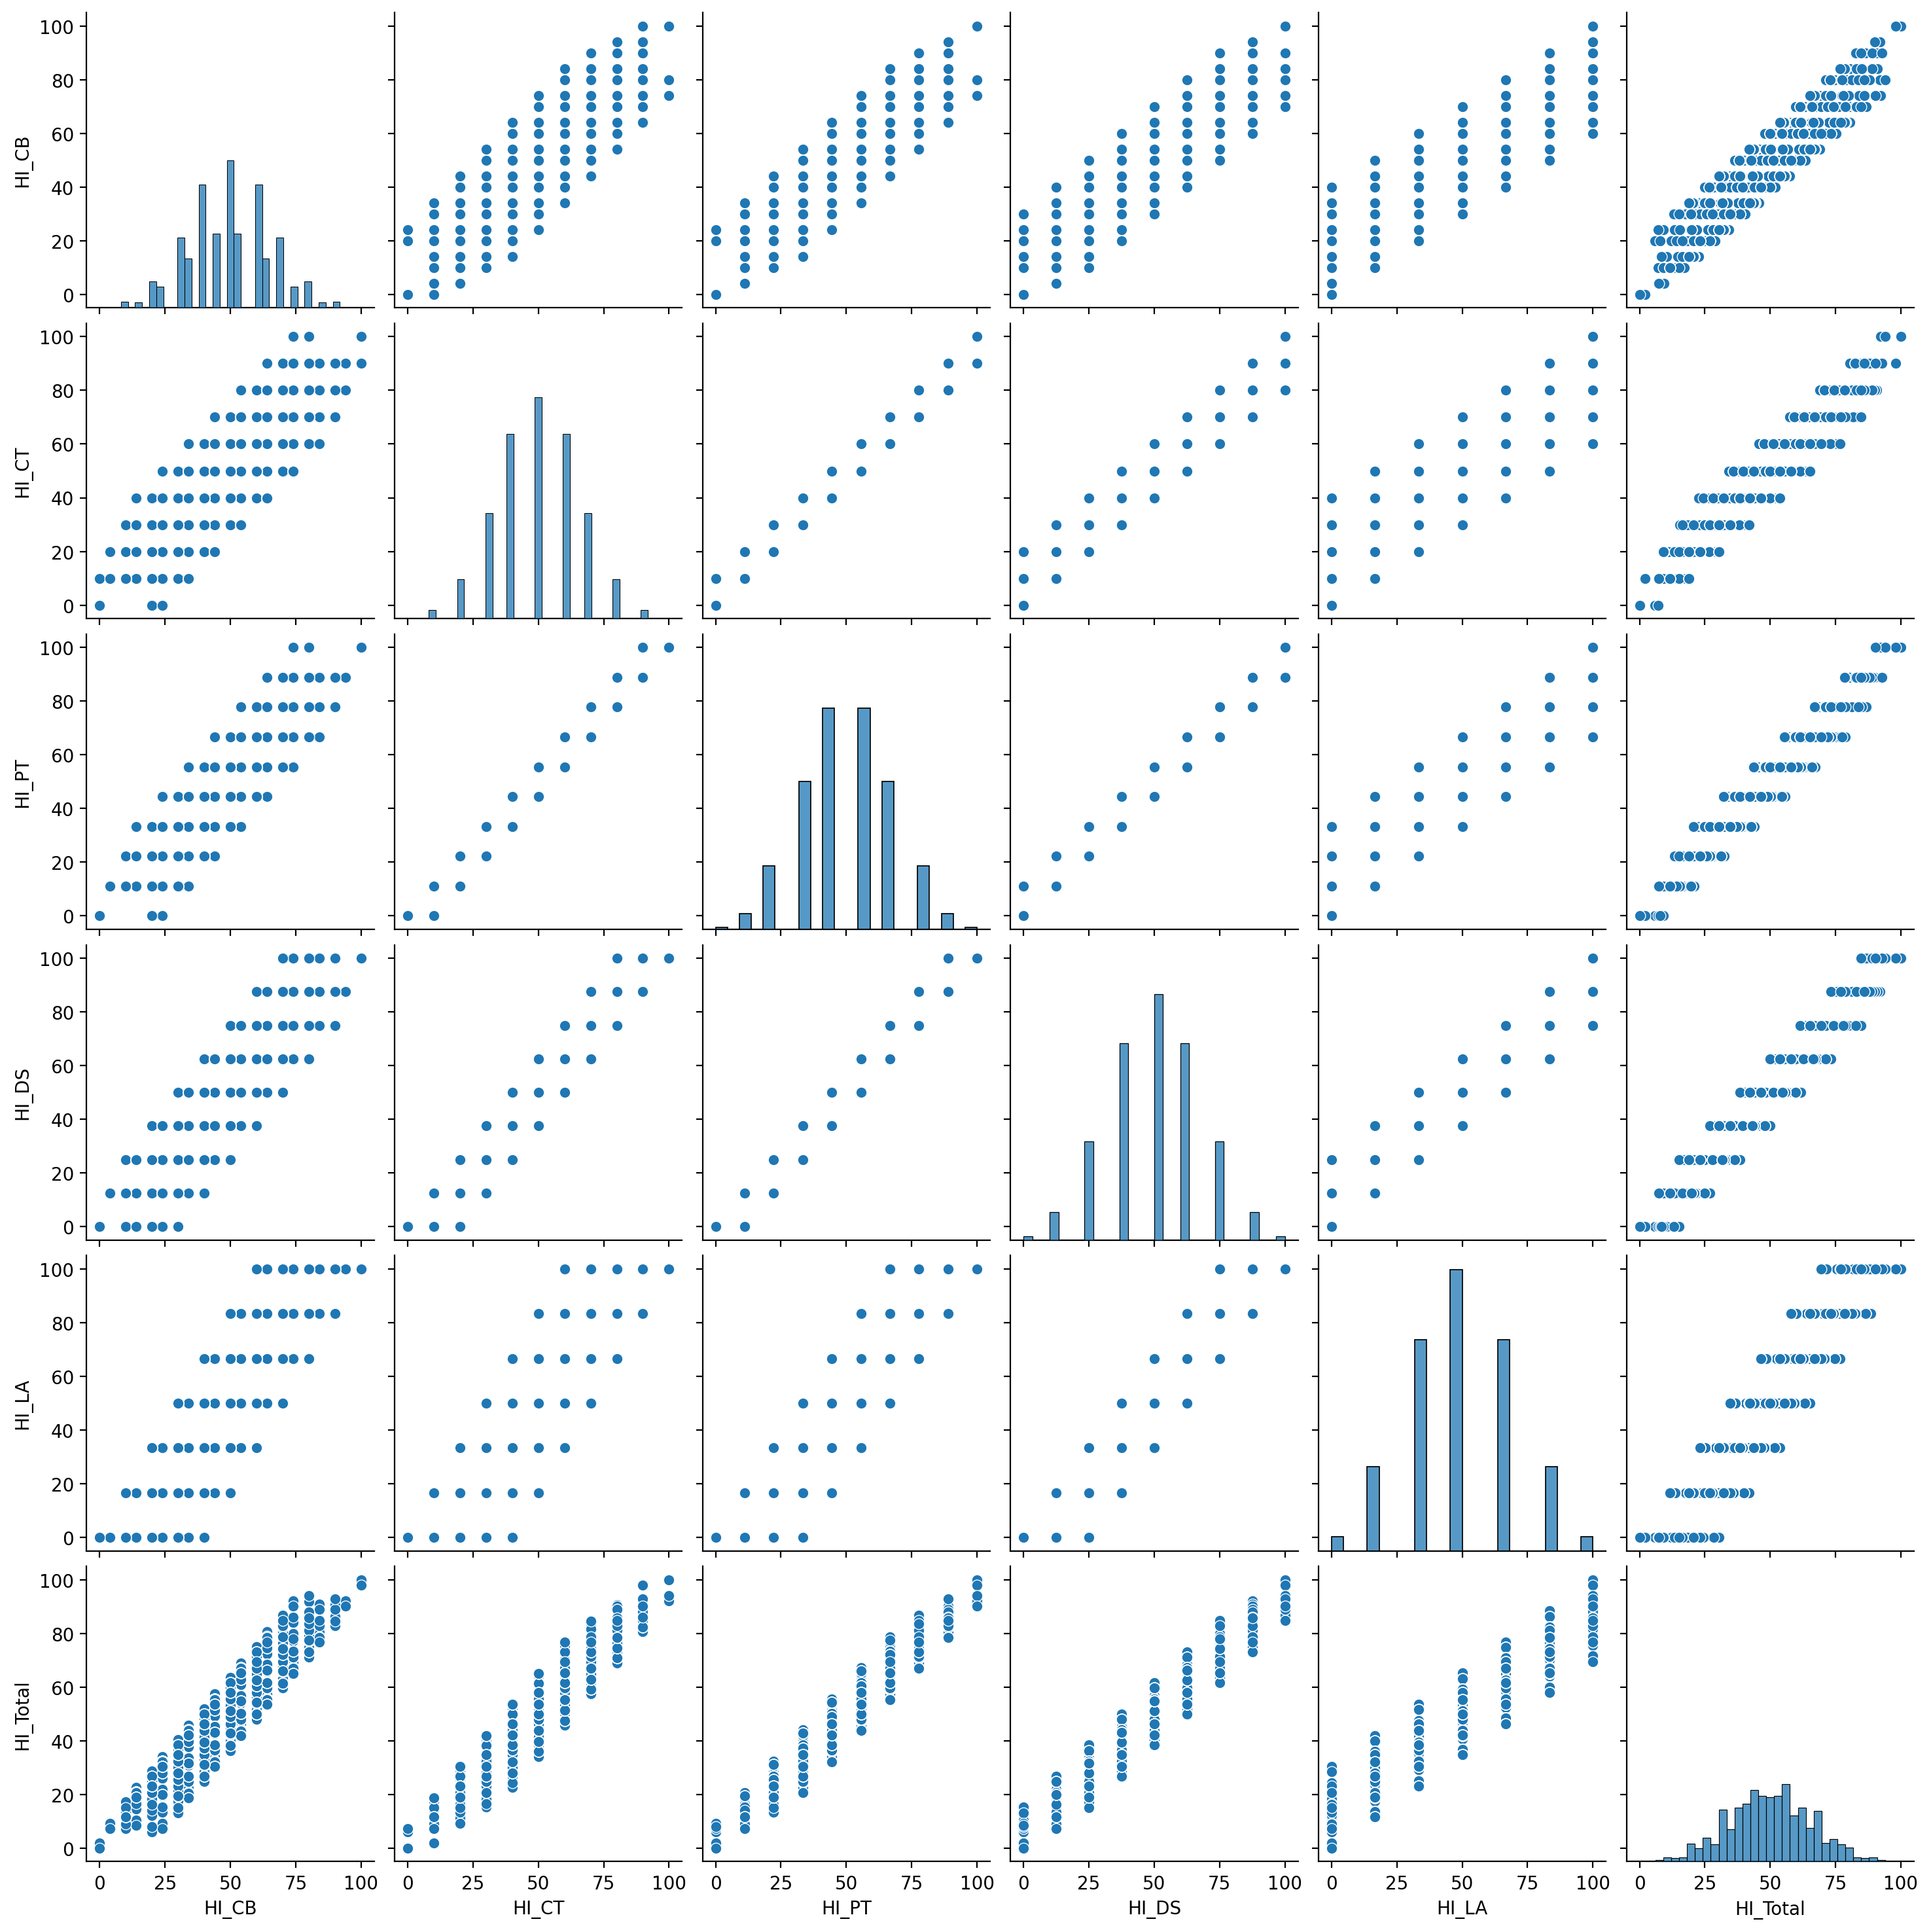

In [11]:
sns.pairplot(df[['HI_CB','HI_CT','HI_PT','HI_DS','HI_LA','HI_Total']])

In [12]:
df[['HI_CB' ,'HI_CT','HI_PT','HI_DS','HI_LA','HI_Total']].corr()

,HI_CB,HI_CT,HI_PT,HI_DS,HI_LA,HI_Total
HI_CB,1.000000,0.711640,0.750134,0.757750,0.787477,0.888994
HI_CT,0.711640,1.000000,0.948683,0.894427,0.774597,0.924410
HI_PT,0.750134,0.948683,1.000000,0.942809,0.816497,0.952998
HI_DS,0.757750,0.894427,0.942809,1.000000,0.866025,0.951496
HI_LA,0.787477,0.774597,0.816497,0.866025,1.000000,0.912542
HI_Total,0.888994,0.924410,0.952998,0.951496,0.912542,1.000000


In [13]:
import sklearn
from sklearn.linear_model import LinearRegression

In [14]:
model = LinearRegression()
model

LinearRegression()

In [15]:
len(df)

3072

In [16]:
df.columns

Index(['CB_IR_Si', 'CB_ConT_Si', 'CB_CR_Si', 'CB_SF6Press_Si', 'CB_SF6Dew_Si',
       'CB_%SF6_Si', 'CB_SF6Pur_Si', 'CB_SO2_Si', 'CB_Vis_Si', 'CB_Gas_Si',
       'HI_CB', 'CT_CR_Si', 'CT_IR_Si', 'CT_IP_Si', 'CT_Turn_Si',
       'CT_Break_Si', 'CT_Water_Si', 'CT_Fas_Si', 'CT_UC_Si', 'CT_Ter_Si',
       'CT_Oil_Si', 'HI_CT', 'PT_CR_Si', 'PT_IR_Si.1', 'PT_IP_Si.1',
       'PT_Turn _Si.1', 'PT_Break_Si.1', 'PT_Fas_Si.1', 'PT_UC_Si.1',
       'PT_Ter_Si.1', 'PT_Oil_Si.1', 'HI_PT', 'DS_CR_Si', 'DS_IR_Si',
       'DS_IP_Si', 'DS_Fas_Si', 'DS_UC_Si', 'DS_Func_Si', 'DS_TTh_Si',
       'DS_Lub_Si', 'HI_DS', 'LA_CR_Si', 'LA_IR_Si', 'LA_IP_Si', 'LA_Fas_Si',
       'LA_UC_Si', 'LA_Ter_Si', 'HI_LA', 'HI_Total'],
      dtype='object')

In [17]:
x=df.drop(columns=['HI_Total'])[:500]
y=df['HI_Total'][:500]

In [18]:
len(x)

500

In [19]:
y.head()

0    100.000000
1     88.402778
2     88.402778
3     76.805556
4     88.402778
Name: HI_Total, dtype: float64

In [20]:
model.fit(x, y)

LinearRegression()

In [21]:
model.score(x,y)

1.0

In [22]:
model.intercept_

3.67081298645887

In [24]:
x.head(500)

,CB_IR_Si,CB_ConT_Si,CB_CR_Si,CB_SF6Press_Si,CB_SF6Dew_Si,CB_%SF6_Si,CB_SF6Pur_Si,CB_SO2_Si,CB_Vis_Si,CB_Gas_Si,...,DS_TTh_Si,DS_Lub_Si,HI_DS,LA_CR_Si,LA_IR_Si,LA_IP_Si,LA_Fas_Si,LA_UC_Si,LA_Ter_Si,HI_LA
0,0,0,0,0,0,0,0,0,0,0,...,0,0,100.0,0,0,0,0,0,0,100.000000
1,0,0,0,0,0,0,0,0,0,5,...,0,5,87.5,0,0,0,0,0,5,83.333333
2,0,0,0,0,0,0,0,0,5,0,...,5,0,87.5,0,0,0,0,5,0,83.333333
3,0,0,0,0,0,0,0,0,5,5,...,5,5,75.0,0,0,0,0,5,5,66.666667
4,0,0,0,0,0,0,0,5,0,0,...,0,0,87.5,0,0,0,5,0,0,83.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0,5,0,3,5,0,5,5,5,5,...,5,5,12.5,5,0,5,5,5,5,16.666667
496,0,5,0,3,5,5,0,0,0,0,...,0,0,50.0,5,5,0,0,0,0,66.666667
497,0,5,0,3,5,5,0,0,0,5,...,0,5,37.5,5,5,0,0,0,5,50.000000
498,0,5,0,3,5,5,0,0,5,0,...,5,0,37.5,5,5,0,0,5,0,50.000000


In [25]:
model.coef_

array([ 0.00417179, -0.02845634, -0.02845634, -0.02845634, -0.02047958,
       -0.00720948, -0.01648592, -0.02203152, -0.02811832, -0.0098191 ,
        0.28577183,  0.01959026,  0.00878359,  0.04543742, -0.01849422,
       -0.01025456, -0.01467016, -0.01235105, -0.01096465, -0.0081865 ,
       -0.01870596,  0.0416658 ,  0.01212085, -0.04771659,  0.02693896,
       -0.01171866, -0.01467016, -0.01235105, -0.01096465, -0.0081865 ,
       -0.01245502,  0.35190777,  0.03766287,  0.02693896, -0.01171866,
       -0.01467016, -0.01235105, -0.01096465, -0.01321229, -0.01245502,
        0.15579171, -0.01171866, -0.01467016, -0.01235105, -0.01096465,
       -0.0081865 , -0.01245502,  0.12815476])

In [26]:
x_test=df.drop(columns=['HI_Total'])[500:]
x_test.head()

,CB_IR_Si,CB_ConT_Si,CB_CR_Si,CB_SF6Press_Si,CB_SF6Dew_Si,CB_%SF6_Si,CB_SF6Pur_Si,CB_SO2_Si,CB_Vis_Si,CB_Gas_Si,...,DS_TTh_Si,DS_Lub_Si,HI_DS,LA_CR_Si,LA_IR_Si,LA_IP_Si,LA_Fas_Si,LA_UC_Si,LA_Ter_Si,HI_LA
500,0,5,0,3,5,5,0,5,0,0,...,0,0,37.5,5,5,0,5,0,0,50.000000
501,0,5,0,3,5,5,0,5,0,5,...,0,5,25.0,5,5,0,5,0,5,33.333333
502,0,5,0,3,5,5,0,5,5,0,...,5,0,25.0,5,5,0,5,5,0,33.333333
503,0,5,0,3,5,5,0,5,5,5,...,5,5,12.5,5,5,0,5,5,5,16.666667
504,0,5,0,3,5,5,5,0,0,0,...,0,0,37.5,5,5,5,0,0,0,50.000000


In [27]:
y_hat=model.predict(x_test)
y_hat

array([43.99166667, 32.39444444, 32.39444444, ..., 13.44165614,
       13.44165614,  1.84443392])

In [28]:
dc=pd.concat([df[500:].reset_index(), pd.Series(y_hat, name='predicted')], axis='columns')
dc

,index,CB_IR_Si,CB_ConT_Si,CB_CR_Si,CB_SF6Press_Si,CB_SF6Dew_Si,CB_%SF6_Si,CB_SF6Pur_Si,CB_SO2_Si,CB_Vis_Si,...,HI_DS,LA_CR_Si,LA_IR_Si,LA_IP_Si,LA_Fas_Si,LA_UC_Si,LA_Ter_Si,HI_LA,HI_Total,predicted
0,500,0,5,0,3,5,5,0,5,0,...,37.5,5,5,0,5,0,0,50.000000,43.991667,43.991667
1,501,0,5,0,3,5,5,0,5,0,...,25.0,5,5,0,5,0,5,33.333333,32.394444,32.394444
2,502,0,5,0,3,5,5,0,5,5,...,25.0,5,5,0,5,5,0,33.333333,32.394444,32.394444
3,503,0,5,0,3,5,5,0,5,5,...,12.5,5,5,0,5,5,5,16.666667,20.797222,20.797222
4,504,0,5,0,3,5,5,5,0,0,...,37.5,5,5,5,0,0,0,50.000000,43.991667,43.991667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2567,3067,5,5,5,5,5,5,5,0,5,...,12.5,5,5,5,0,5,5,16.666667,11.597222,13.441656
2568,3068,5,5,5,5,5,5,5,5,0,...,25.0,5,5,5,5,0,0,33.333333,23.194444,25.038878
2569,3069,5,5,5,5,5,5,5,5,0,...,12.5,5,5,5,5,0,5,16.666667,11.597222,13.441656
2570,3070,5,5,5,5,5,5,5,5,5,...,12.5,5,5,5,5,5,0,16.666667,11.597222,13.441656


In [29]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [30]:
model_a = smf.ols(formula='HI_Total ~  HI_CB + HI_CT + HI_PT + HI_DS + HI_LA', data=df[:500]).fit()

In [31]:
print(model_a.summary())

                            OLS Regression Results                            
Dep. Variable:               HI_Total   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.363e+31
Date:                Sat, 01 Apr 2023   Prob (F-statistic):               0.00
Time:                        22:10:32   Log-Likelihood:                 14879.
No. Observations:                 500   AIC:                        -2.975e+04
Df Residuals:                     495   BIC:                        -2.973e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0020   1.46e-16   1.35e+13      0.0

In [32]:
model_a.params 

Intercept    0.001964
HI_CB        0.300000
HI_CT        0.199804
HI_PT        0.200177
HI_DS        0.150000
HI_LA        0.150000
dtype: float64

In [33]:
model_a.pvalues

Intercept    0.0
HI_CB        0.0
HI_CT        0.0
HI_PT        0.0
HI_DS        0.0
HI_LA        0.0
dtype: float64

In [34]:
model.intercept_

3.67081298645887

In [35]:
model.coef_

array([ 0.00417179, -0.02845634, -0.02845634, -0.02845634, -0.02047958,
       -0.00720948, -0.01648592, -0.02203152, -0.02811832, -0.0098191 ,
        0.28577183,  0.01959026,  0.00878359,  0.04543742, -0.01849422,
       -0.01025456, -0.01467016, -0.01235105, -0.01096465, -0.0081865 ,
       -0.01870596,  0.0416658 ,  0.01212085, -0.04771659,  0.02693896,
       -0.01171866, -0.01467016, -0.01235105, -0.01096465, -0.0081865 ,
       -0.01245502,  0.35190777,  0.03766287,  0.02693896, -0.01171866,
       -0.01467016, -0.01235105, -0.01096465, -0.01321229, -0.01245502,
        0.15579171, -0.01171866, -0.01467016, -0.01235105, -0.01096465,
       -0.0081865 , -0.01245502,  0.12815476])

In [36]:
ya_hat=model_a.predict(x_test)

In [37]:
ya_hat.head()

500    43.991667
501    32.394444
502    32.394444
503    20.797222
504    43.991667
dtype: float64

In [38]:
y_hat[:5]

array([43.99166667, 32.39444444, 32.39444444, 20.79722222, 43.99166667])